<font size='6'><b>OpenCV in python</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "85%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 55% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 30%>
        by Haedong Jeong<br>iSystems (http://isystems.unist.ac.kr/)<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

__Test images__
- <a href="./test_images.zip" download>Test Images</a>


__Reference__

- [OpenCV-Python Tutorials Website](https://opencv-python-tutroals.readthedocs.io/en/latest/) 

- <a href="./image_files/Raspberry Pi Computer Vision Programming.pdf" target="_blank">Raspberry Pi Computer Vision Programming.pdf</a>

# 1. Working with images

### Using OpenCV

The preceding script imports an image, displays it (pop up), and waits for a keystroke to close the window. The screenshot is as follows:

In [ ]:
import cv2
img = cv2.imread('test_images/lena_color_512.tif',1)
cv2.imshow('Lena',img)
cv2.waitKey(0)
cv2.destroyWindow('Lena')

<img src = "././image_files/result_imshow.png" style="border:1px solid black", width = 400>

### Using matplotlib

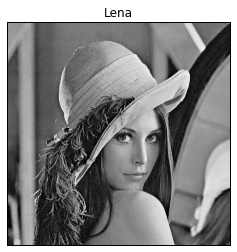

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Program to load a color image in gray scale and to display using matplotlib
img = cv2.imread('./test_images/lena_color_512.tif',0)
plt.imshow(img,cmap='gray')
plt.title('Lena')
plt.xticks([])
plt.yticks([])
plt.show()

### Drawing geometric shapes

In [ ]:
import cv2
import numpy as np

image = np.zeros((200,200,3), np.uint8)

cv2.line(image,(0,199),(199,0),(0,0,255),2)
cv2.rectangle(image,(20,20),(60,60),(255,0,0),1)
cv2.circle(image,(80,80),10,(0,255,0),-1)
cv2.ellipse(image,(99,99),(40,20),0,0,360,(128,128,128),-1)

points = np.array([[100,5],[125,30],[175,20],[185,10]], np.int32)
points = points.reshape((-1,1,2))

cv2.polylines(image,[points],True,(255,255,0))
cv2.putText(image,'Test',(80,180),cv2.FONT_HERSHEY_DUPLEX,1, (255,0,255))
cv2.imshow('Shapes',image)

cv2.waitKey(0)
cv2.destroyAllWindows()

<img src = "./image_files/result_draw.png" style="border:1px solid black", width = 200>

### Working with trackbar and named window

In [ ]:
import numpy as np
import cv2

def empty(z):
    pass
# Create a black background
image = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('Palette')
# create trackbars for colors and associate those with Pallete
cv2.createTrackbar('B','Palette',0,255,empty)
cv2.createTrackbar('G','Palette',0,255,empty)
cv2.createTrackbar('R','Palette',0,255,empty)
while(True):
    cv2.imshow('Palette',image)
    if cv2.waitKey(1) == 27:
        break
    
    # fetch the color value
    blue = cv2.getTrackbarPos('B','Palette')
    green = cv2.getTrackbarPos('G','Palette')
    red = cv2.getTrackbarPos('R','Palette')
    image[:] = [blue,green,red]
    
cv2.destroyWindow('Pallete')

<img src = "./image_files/trackbar_result.png" style="border:1px solid black", width = 400>

### Working with a webcam

#### Capturing an image from a webcam using OpenCV

In [ ]:
import cv2
# initialize the camera
cam = cv2.VideoCapture(0)
ret, image = cam.read()
if ret:
    cv2.imshow('SnapshotTest',image)
    cv2.waitKey(0)
    cv2.destroyWindow('SnapshotTest')
    #cv2.imwrite('/home/pi/book/output/SnapshotTest.jpg',image)
cam.release()

<img src = "./image_files/result_snapshot.png" style="border:1px solid black", width = 350>

#### Display a live video stream and a modificated frame size

In [ ]:
import cv2

cam = cv2.VideoCapture(0)
print("Default Resolution is " + str(int(cam.get(3))) + "x" + str(int(cam.get(4))))

w=320
h=240
cam.set(3,w)
cam.set(4,h)

print("Now resolution is set to " + str(w) + "x" + str(h))

while(True):
    # Capture frame-by-frame
    ret, frame = cam.read()
    # Display the resulting frame
    cv2.imshow('Video Test',frame)
    # Wait for Escape Key
    if cv2.waitKey(1) == 27 :
        break
# When everything done, release the capture
cam.release()
cv2.destroyAllWindows()

<img src = "./image_files/result_livecam.png" style="border:1px solid black", width = 320>

#### Saving a video

VideoWriter function is changed in new version of OpenCV.

In [ ]:
import cv2

cam = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'WMV2')
output = cv2.VideoWriter('E:/VideoStream.avi',fourcc,40.0,(640,480))

while (cam.isOpened()):
    ret, frame = cam.read()
    if ret == True:
        output.write(frame)
        cv2.imshow('VideoStream', frame )
        if cv2.waitKey(1) == 27 :
            break
    else:
        break
            
cam.release()
output.release()
cv2.destroyAllWindows()

# 2. Basic Image Processing

### Arithmetic operations on images

In [ ]:
import cv2
img1 = cv2.imread('test_images/lena_color_512.tif',1)
img2 = cv2.imread('test_images/mandril_color.tif',1)

cv2.imshow('Lena',img1)
cv2.waitKey(0)

cv2.imshow('Mandril',img2)
cv2.waitKey(0)

cv2.imshow('Addition',cv2.add(img1,img2))
cv2.waitKey(0)

cv2.imshow('Lena-Mandril',cv2.subtract(img1,img2))
cv2.waitKey(0)

cv2.imshow('Mandril-Lena',cv2.subtract(img2,img1))
cv2.waitKey(0)

cv2.destroyAllWindows()

<table>
<tr>
<td>
<img src = ./image_files/result_imshow.png style="border:1px solid black", width = 200>
</td>
<td>
<img src = "./image_files/mandril.png" style="border:1px solid black", width = 200>
</td>
<td>
<img src = "./image_files/addition.png" style="border:1px solid black", width = 200> 
</td>
<td>
<img src = "./image_files/lena-mandril.png" style="border:1px solid black", width = 200>
</td>
<td>
<img src = "./image_files/mandril-lena.png" style="border:1px solid black", width = 200>
</td>
</tr>
</table>

### Blending and transitioning images

In [ ]:
import cv2
import numpy as np
import time
img1 = cv2.imread('test_images/lena_color_512.tif',1)
img2 = cv2.imread('test_images/mandril_color.tif',1)
for i in np.linspace(0,1,40):
    alpha=i
    beta=1-alpha
    print('ALPHA ='+ str(alpha)+' BETA ='+str (beta))
    cv2.imshow('Image Transition',cv2.addWeighted(img1,alpha,img2,beta,0))
    time.sleep(0.05)
    if cv2.waitKey(1) == 27 :
        break
cv2.destroyAllWindows()

<img src = "./image_files/image_blending.png" style="border:1px solid black", width = 300>

### Splitting and merging image color channels

In [ ]:
import cv2
img = cv2.imread('test_images/mandril_color.tif',1)
b,g,r = cv2.split (img)
cv2.imshow('Blue Channel',b)
cv2.imshow('Green Channel',g)
cv2.imshow('Red Channel',r)
img=cv2.merge((b,g,r))
cv2.imshow('Merged Output',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<table>
<tr>
<td>
<img src = ./image_files/merge_output.png style="border:1px solid black", width = 200>
</td>
<td>
<img src = "./image_files/blue channel.png" style="border:1px solid black", width = 200>
</td>
<td>
<img src = "./image_files/red channel.png" style="border:1px solid black", width = 200> 
</td>
<td>
<img src = "./image_files/green channel.png" style="border:1px solid black", width = 200> 
</td>
</tr>
</table>

### Creating a negative of an image

In [ ]:
import cv2
img = cv2.imread('test_images/peppers_color.tif')
grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
negative = abs(255-grayscale)
cv2.imshow('Original',img)
cv2.imshow('Grayscale',grayscale)
cv2.imshow('Negative',negative)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src = "./image_files/negative_image.png" style="border:1px solid black", width = 700> 

### Logical operations on images

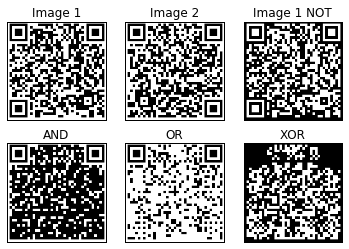

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('test_images/qrcode_ver.png',0)
img2 = cv2.imread('test_images/qrcode_hor.png',0)

not_out=cv2.bitwise_not(img1)
and_out=cv2.bitwise_and(img1,img2)
or_out=cv2.bitwise_or(img1,img2)
xor_out=cv2.bitwise_xor(img1,img2)


titles = ['Image 1','Image 2','Image 1 NOT','AND','OR','XOR']
images = [img1,img2,not_out,and_out,or_out,xor_out]

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 3. Colorspaces, Transformations, and Threshold

### Colorspaces and conversions

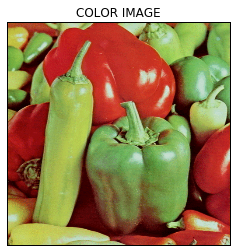

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('test_images/peppers_color.tif',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
plt.imshow (img) , plt.title ('COLOR IMAGE'),
plt.xticks([]), plt.yticks([])
plt.show()

### Tracking in real time based on color

In [ ]:
import numpy as np
import cv2
cam = cv2.VideoCapture(0)

while ( True ):
    ret, frame = cam.read()
    
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    image_mask=cv2.inRange(hsv,np.array([40,50,50]),np.array([80,255,255]))
    
    output=cv2.bitwise_and(frame,frame,mask=image_mask)
    
    cv2.imshow('Original',frame)
    cv2.imshow('Output',output)
    
    if cv2.waitKey(1) == 27:
        break
        
cv2.destroyAllWindows()
cam.release()

<img src = "./image_files/tracking_color.png" style="border:1px solid black", width = 700> 

### Image transformation
#### Scaling

In [ ]:
import cv2
img = cv2.imread('test_images/lena_color_512.tif',1)
upscale = cv2.resize(img,None,fx=1.5,fy=1.5,interpolation=cv2.INTER_CUBIC)
downscale = cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
cv2.imshow('upscale',upscale)
cv2.waitKey(0)
cv2.imshow('downscale',downscale)
cv2.waitKey(0)
cv2.imshow('original',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src = "./image_files/scaling.png" style="border:1px solid black", width = 700> 

#### Translation, rotation, and affine transformation

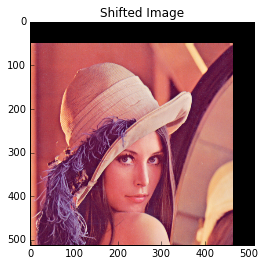

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('test_images/lena_color_512.tif',1)
temp=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

rows,cols,channel = img.shape

T = np.float32([[1,0,-50],[0,1,50]])

output = cv2.warpAffine(temp,T,(cols,rows))

plt.imshow ( output ) , plt.title ('Shifted Image')
plt.show()

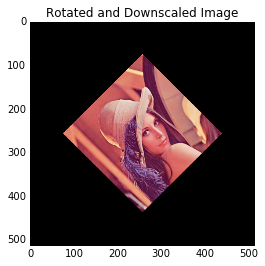

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test_images/lena_color_512.tif',1)
temp =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

rows,cols,channel = img.shape

R = cv2.getRotationMatrix2D((cols/2,rows/2),45,0.5)

output = cv2.warpAffine(temp,R,(cols,rows))
plt.imshow ( output ) , plt.title ('Rotated and Downscaled Image')
plt.show()

In [7]:
import cv2
from time import sleep

img = cv2.imread('test_images/lena_color_512.tif',1)
rows,cols,channels = img.shape
angle = 0

while(1):
    if angle == 360:
        angle=0
        
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    rotated = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow('Rotating Image',rotated)
    angle=angle+1
    sleep(0.05)
    
    if cv2.waitKey(1) == 27 :
        break
cv2.destroyAllWindows()

<img src = "./image_files/affine_animation.png" style="border:1px solid black", width = 400> 

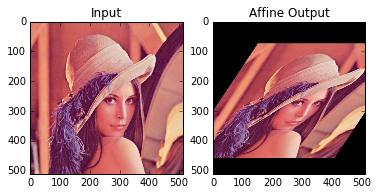

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

image = cv2.imread('test_images/lena_color_512.tif',1)

#changing the colorspace from BGR->RGB
input = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
rows,cols,channels = input.shape

points1 = np.float32([[100,100],[300,100],[100,300]])
points2 = np.float32([[200,150],[400,150],[100,300]])

A = cv2.getAffineTransform(points1,points2)

output = cv2.warpAffine(input,A,(cols,rows))

plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.subplot(122),plt.imshow(output),plt.title('Affine Output')
plt.show()

#### Perspective transformation

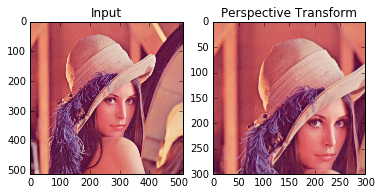

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('test_images/lena_color_512.tif',1)

#changing the colorspace from BGR->RGB
input = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
rows,cols,channels = input.shape

points1 = np.float32([[0,0],[400,0],[0,400],[400,400]])
points2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
P = cv2.getPerspectiveTransform(points1,points2)

output = cv2.warpPerspective(input,P,(300,300))

plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.subplot(122),plt.imshow(output),plt.title('Perspective Transform')
plt.show()

### Thresholding image

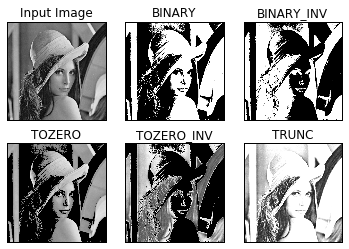

In [10]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('test_images/lena_color_512.tif',0)

th=127
max_val=255

ret,o1 = cv2.threshold(img,th,max_val,cv2.THRESH_BINARY)
ret,o2 = cv2.threshold(img,th,max_val,cv2.THRESH_BINARY_INV)
ret,o3 = cv2.threshold(img,th,max_val,cv2.THRESH_TOZERO)
ret,o4 = cv2.threshold(img,th,max_val,cv2.THRESH_TOZERO_INV)
ret,o5 = cv2.threshold(img,th,max_val,cv2.THRESH_TRUNC)
titles = ['Input Image','BINARY','BINARY_INV','TOZERO','TOZERO_INV','TRUNC']
output = [img, o1, o2, o3, o4, o5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(output[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 4. Let's Make Some Noise

### Introducing noise to an image

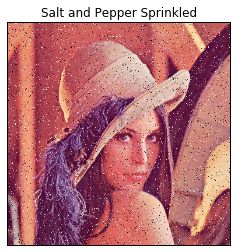

In [11]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

img = cv2.imread('test_images/lena_color_512.tif',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = np.zeros(input.shape,np.uint8)
p = 0.05 # probablity of noise

for i in range (input.shape[0]):
    for j in range(input.shape[1]):
        r = random.random()
        if r < p/2:
            output[i][j] = 0,0,0
        elif r < p:
            output[i][j] = 255,255,255
        else:
            output[i][j] = input[i][j]
plt.imshow(output), plt.title('Salt and Pepper Sprinkled')
plt.xticks([]),plt.yticks([])
plt.show()

### 2D convolution filtering

box filter

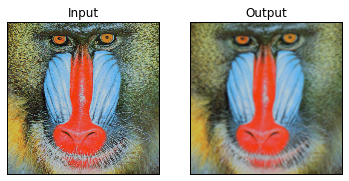

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test_images/mandril_color.tif',1)

input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

output = cv2.filter2D(input,-1,np.ones((7,7),np.float32)/49)

plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.show()

### Median filter

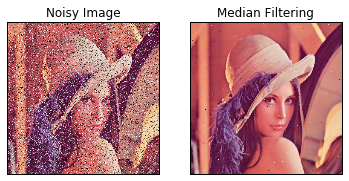

In [13]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

img = cv2.imread('test_images/lena_color_512.tif',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

output = np.zeros(input.shape,np.uint8)
p = 0.2 # probablity of noise

for i in range (input.shape[0]):
    for j in range(input.shape[1]):
        r = random.random()
        if r < p/2:
            output[i][j] = 0,0,0
        elif r < p:
            output[i][j] = 255,255,255
        else:
            output[i][j] = input[i][j]
            
noise_removed = cv2.medianBlur(output,3)
plt.subplot(121),plt.imshow(output),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(noise_removed),plt.title('Median Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

# 5. Edges, Circles, and Lines' Detection
### High-pass filter

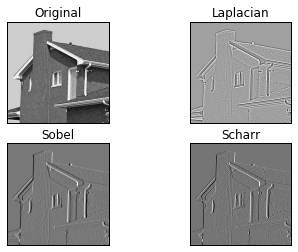

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test_images/house.tif',0)
laplacian = cv2.Laplacian(img,ddepth=cv2.CV_32F,ksize=17,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
sobel = cv2.Sobel(img,ddepth=cv2.CV_32F,dx=1,dy=0,ksize=11,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
scharr = cv2.Scharr(img,ddepth=cv2.CV_32F,dx=1,dy=0,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

images=[img,laplacian,sobel,scharr]
titles=['Original','Laplacian','Sobel','Scharr']

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],cmap = 'gray')
    plt.title(titles[i]),
    plt.xticks([]), plt.yticks([])

plt.show()

### Canny edge detector

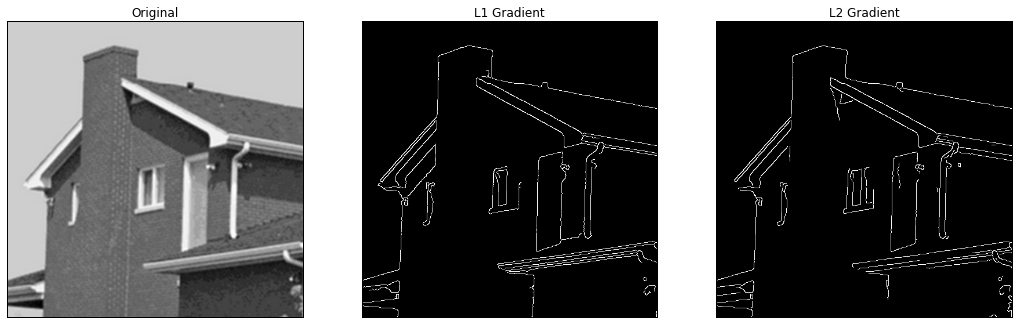

In [15]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test_images/house.tif',0)
edges1 = cv2.Canny(img,50,300,L2gradient=False)
edges2 = cv2.Canny(img,100,150,L2gradient=True)

images = [img,edges1,edges2]
titles = ['Original','L1 Gradient','L2 Gradient']

plt.figure(figsize=(18,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],cmap = 'gray')
    plt.title(titles[i]),
    plt.xticks([]), plt.yticks([])
plt.show()

# 6. Hough circle and line transformations
### Hough circle

In [ ]:
import cv2

cam = cv2.VideoCapture(0)

while (True):
    ret , frame = cam.read()
    grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    blur = cv2.blur(grey,(5,5))
    circles = cv2.HoughCircles(blur,method=cv2.HOUGH_GRADIENT,dp=1,minDist=200,param1=50,param2=13,minRadius=30,maxRadius=175)

    if circles is not None:
        for i in circles [0,:]:
            cv2.circle(frame,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.circle(frame,(i[0],i[1]),2,(0,0,255),3)
    cv2.imshow('Detected',frame)
            
    if cv2.waitKey(1) == 27:
        break
                
cv2.destroyAllWindows()
cam.release()

<img src = "./image_files/hough circle.png" style="border:1px solid black", width = 400> 

### Hough line

In [ ]:
import numpy as np
import cv2
cam = cv2.VideoCapture(0)

while (1):
    ret, img = cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,50,150,apertureSize=5,L2gradient=True)
    
    lines = cv2.HoughLines(edges,1,np.pi/180,290)
    
    if lines is not None:
        for i in range(lines.shape[0]):
            rho = lines[i,0,0]
            theta = lines[i,0,1]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            pts1 = ( int(x0 + 1000*(-b)) , int(y0 + 1000*(a)) )
            pts2 = ( int(x0 - 1000*(-b)) , int(y0 - 1000*(a)) )
            cv2.line(img,pts1,pts2,(0,0,255),2)
            
    cv2.imshow('Detected Lines',img)    
    if cv2.waitKey(1) == 27:
        break
        
cv2.destroyAllWindows()
cam.release()

<img src = "./image_files/hough line.png" style="border:1px solid black", width = 400> 

# 7. Image Restoration, Quantization, and Depth Map

### Restoring images using inpainting

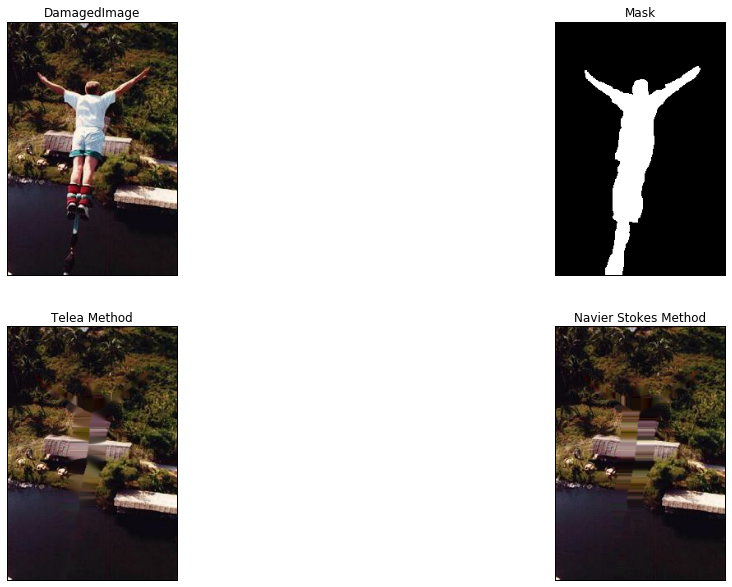

In [16]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('test_images/input.jpg')
mask = cv2.imread('test_images/input-mask.bmp',0)
mask = abs(255-mask)

input = cv2.cvtColor ( image , cv2.COLOR_BGR2RGB )
output_TELEA = cv2.inpaint(input,mask,1,cv2.INPAINT_TELEA)
output_NS = cv2.inpaint(input,mask,1,cv2.INPAINT_NS)

plt.figure(figsize=(18,10))
plt.subplot(221),plt.imshow(input),plt.title('DamagedImage'),plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(mask,cmap='gray'),plt.title('Mask'),plt.xticks([]),plt.yticks([])

plt.subplot(223),plt.imshow(output_TELEA),plt.title('Telea Method'),plt.xticks([]),plt.yticks([])
plt.subplot(224),plt.imshow(output_NS),plt.title('Navier Stokes Method'),plt.xticks([]),plt.yticks([])

plt.show()

### K-means clustering and image quantization

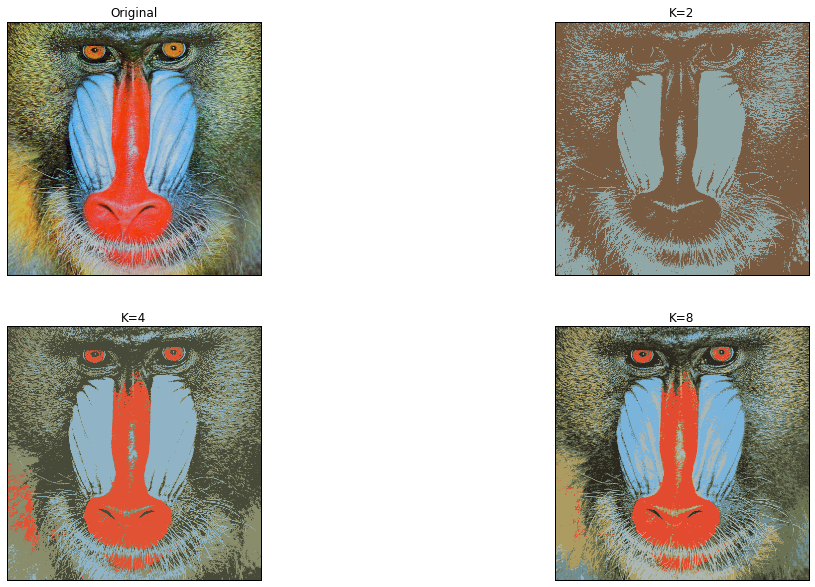

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image=cv2.imread('test_images/mandril_color.tif')

input = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
Z=input.reshape((-1,3))
Z=np.float32(Z)
criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

K=2
ret,label1,center1=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

center1=np.uint8(center1)
res1=center1[label1.flatten()]
output1=res1.reshape((image.shape))

K=4
ret,label2,center2=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center2=np.uint8(center2)
res2=center2[label2.flatten()]
output2=res2.reshape((image.shape))

K=8
ret,label3,center3=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center3=np.uint8(center3)
res3=center3[label3.flatten()]
output3=res3.reshape((image.shape))

titles=['Original','K=2','K=4','K=8']
output=[input,output1,output2,output3]

plt.figure(figsize=(18,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(output[i]),plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Disparity map and depth estimation

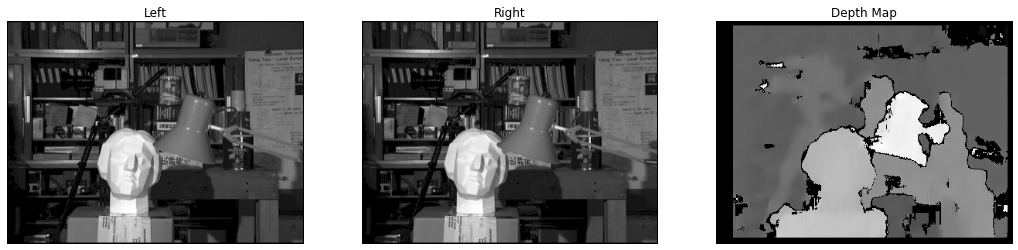

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Right= cv2.imread('test_images/tsukuba-r.tiff',0)
Left = cv2.imread('test_images/tsukuba-l.tiff',0)

stereo_BM_state=cv2.StereoBM_create(numDisparities=16, blockSize=15)
output_map=stereo_BM_state.compute(Left,Right)
titles=['Left','Right','Depth Map']
output=[Left,Right,output_map]

plt.figure(figsize=(18,13))
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(output[i],cmap='gray'),
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 8. Histograms, Contours, Morphological Transformations, and Performance Measurement

### Image histograms

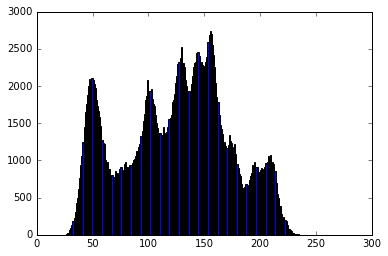

In [19]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('test_images/lena_gray_512.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

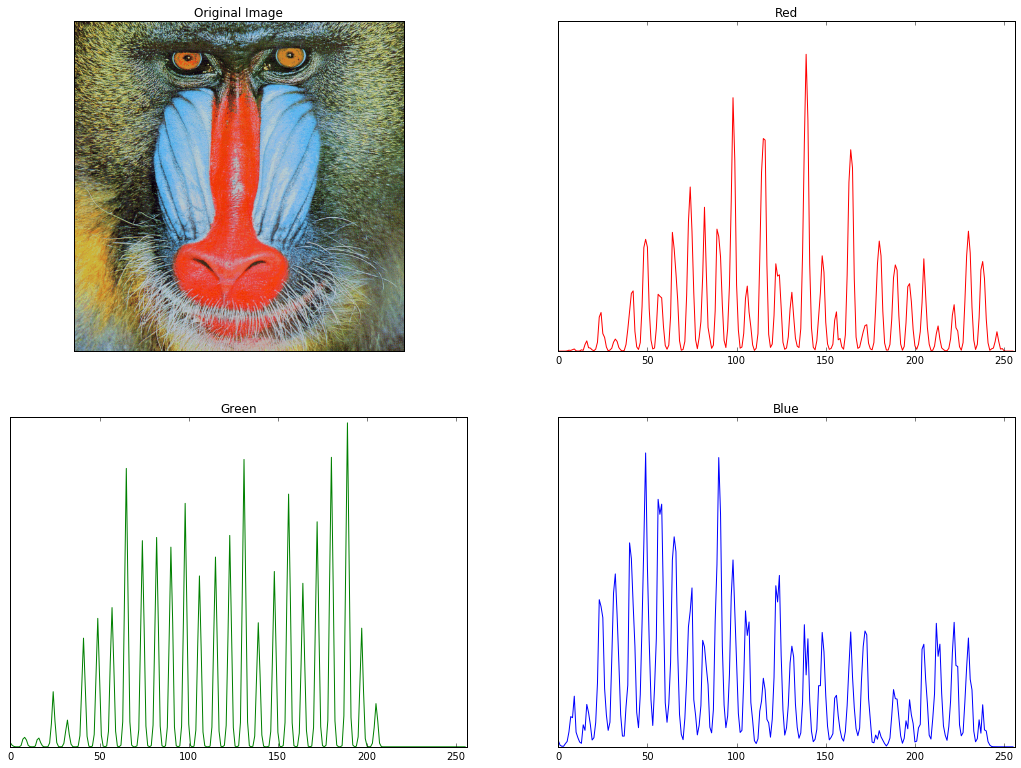

In [20]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('test_images/mandril_color.tif',1)

input=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
histr_RED = cv2.calcHist([input],[0],None,[256],[0,256])
histr_GREEN = cv2.calcHist([input],[1],None,[256],[0,256])
histr_BLUE = cv2.calcHist([input],[2],None,[256],[0,256])

plt.figure(figsize=(18,13))
plt.subplot(221),plt.imshow(input),plt.title('Original Image'),plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.plot(histr_RED,color='r'),plt.title('Red'), plt.xlim([0,256]), plt.yticks([])
plt.subplot(223),plt.plot(histr_GREEN,color='g'), plt.title('Green'), plt.xlim([0,256]), plt.yticks([])
plt.subplot(224),plt.plot(histr_BLUE,color='b'), plt.title('Blue'), plt.xlim([0,256]), plt.yticks([])
plt.show()

### Image contours

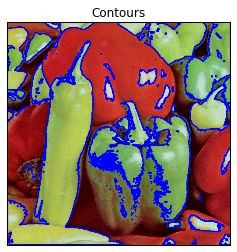

In [21]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('test_images/peppers_color.tif')

input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,thresh = cv2.threshold(gray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[-2:]

cv2.drawContours(input, contours, -1, (0,0,255), 2)
plt.imshow(input),plt.title('Contours')
plt.xticks([]),plt.yticks([])
plt.show()

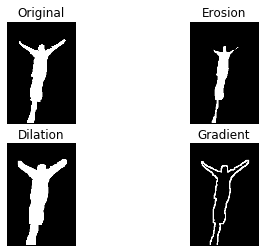

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('test_images/input-mask.bmp',0)
img = abs(255-img)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 2)
dilation = cv2.dilate(img,kernel,iterations = 2)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
titles=['Original','Erosion','Dilation','Gradient']
output=[img,erosion,dilation,gradient]

plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(output[i],cmap='gray')
    plt.title(titles[i]),plt.xticks([]),plt.yticks([])
plt.show()

In [24]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>